Este código implementa o algoritmo AutoCloud, uma abordagem baseada em aprendizado não supervisionado para a detecção de padrões e agrupamento de dados.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
from plotly.subplots import make_subplots
from plotly.offline import plot
import plotly.graph_objects as go


In [3]:
listaCor =np.array(['#4C72B0','#DD8452','#55A868','#C44E52','#8172B3','#937860','#DA8BC3','#8C8C8C','#CCB974','#64B5CD'])

In [4]:
class DataCloud:
	N=0 #Conta o número total de nuvens de dados criadas.
	def __init__(self,x): #É chamado quando uma nova instância de DataCloud é criada.
		self.n=1 #Inicializa o n de pontos na nuvem como 1, pois estamos adicionando o primeiro ponto x.
		self.mean=x #Inicializa a média da nuvem como o valor do primeiro ponto x. A média é o centro da nuvem.
		self.variance=0 #Inicializa a variância como 0, pois com apenas um ponto, não há dispersão.
		self.pertinency=1 #Inicializa o grau de pertinência como 1, indicando que o ponto pertence completamente à nuvem.
		DataCloud.N+=1 #Incrementa o contador de nuvens de dados criadas.
	def addDataClaud(self,x):
		self.n=2 #Define o n de pontos na nuvem como 2, assumindo que estamos adicionando um segundo ponto
		self.mean=(self.mean+x)/2 #Atualiza a média da nuvem. A nova média é a média aritmética entre a média anterior e o novo ponto x.
		self.variance=((np.linalg.norm(self.mean-x))**2) #Atualiza a variância da nuvem. A variância é calculada como o quadrado da distância entre a nova média e o novo ponto x.
	def updateDataCloud(self,n,mean,variance): #Este método atualiza os atributos da nuvem de dados com novos valores.
		self.n=n #Atualiza o número de pontos na nuvem.
		self.mean=mean #Atualiza a média da nuvem.
		self.variance=variance #Atualiza a variância da nuvem.


In [5]:
class AutoCloud:
	c= np.array([DataCloud(0)],dtype=DataCloud)
	alfa= np.array([0.0],dtype=float)
	intersection = np.zeros((1,1),dtype=int)
	listIntersection = np.zeros((1),dtype=int)
	matrixIntersection = np.zeros((1,1),dtype=int)
	relevanceList = np.zeros((1),dtype=int)
	k=1
	def __init__(self, m):
		AutoCloud.m = m
		AutoCloud.c= np.array([DataCloud(0)],dtype=DataCloud)
		AutoCloud.alfa= np.array([0.0],dtype=float)
		AutoCloud.intersection = np.zeros((1,1),dtype=int)
		AutoCloud.listIntersection = np.zeros((1),dtype=int)
		AutoCloud.relevanceList = np.zeros((1),dtype=int)
		AutoCloud.matrixIntersection = np.zeros((1,1),dtype=int)
		AutoCloud.classIndex = []
		AutoCloud.k = 1

	def mergeClouds(self):
		i=0
		while(i<len(AutoCloud.listIntersection)-1):
			merge=False
			j=i+1
			while(j<len(AutoCloud.listIntersection)):
				#print("i",i,"j",j,"l",np.size(AutoCloud.listIntersection),"m",np.size(AutoCloud.matrixIntersection),"c",np.size(AutoCloud.c))
				if(AutoCloud.listIntersection[i] == 1 and AutoCloud.listIntersection[j] == 1):
					AutoCloud.matrixIntersection[i,j] = AutoCloud.matrixIntersection[i,j] + 1;
				nI = AutoCloud.c[i].n
				nJ = AutoCloud.c[j].n
				meanI = AutoCloud.c[i].mean
				meanJ = AutoCloud.c[j].mean
				varianceI = AutoCloud.c[i].variance
				varianceJ = AutoCloud.c[j].variance
				nIntersc = AutoCloud.matrixIntersection[i,j]
				if (nIntersc > (nI - nIntersc) or nIntersc > (nJ - nIntersc)):
					print(f'na iteracao {self.k} houve fusao de clouds')
					merge = True
					#update values
					n = nI + nJ - nIntersc
					mean = ((nI * meanI) + (nJ * meanJ))/(nI + nJ)
					variance = ((nI - 1) * varianceI + (nJ - 1) * varianceJ)/(nI + nJ - 2)
					newCloud = DataCloud(mean)
					newCloud.updateDataCloud(n,mean,variance)
					#atualizando lista de interseção
					AutoCloud.listIntersection = np.concatenate((AutoCloud.listIntersection[0 : i], np.array([1]), AutoCloud.listIntersection[i + 1 : j],AutoCloud.listIntersection[j + 1 : np.size(AutoCloud.listIntersection)]),axis=None)
					#atualizando lista de data clouds
					AutoCloud.c = np.concatenate((AutoCloud.c[0 : i ], np.array([newCloud]), AutoCloud.c[i + 1 : j],AutoCloud.c[j + 1 : np.size(AutoCloud.c)]),axis=None)
					#update  intersection matrix
					M0 = AutoCloud.matrixIntersection
					#Remover linhas
					M1=np.concatenate((M0[0 : i , :],np.zeros((1,len(M0))),M0[i + 1 : j, :],M0[j + 1 : len(M0), :]))
					#remover colunas
					M1=np.concatenate((M1[:, 0 : i ],np.zeros((len(M1),1)),M1[:, i+1 : j],M1[:, j+1 : len(M0)]),axis=1)
					#calculando nova coluna
					col = (M0[:, i] + M0[:, j])*(M0[: , i]*M0[:, j] != 0)
					col = np.concatenate((col[0 : j], col[j + 1 : np.size(col)]))
					#calculando nova linha
					lin = (M0[i, :]+M0[j, :])*(M0[i, :]*M0[j, :] != 0)
					lin = np.concatenate((lin[ 0 : j], lin[j + 1 : np.size(lin)]))
					#atualizando coluna
					M1[:,i]=col
					#atualizando linha
					M1[i,:]=lin
					M1[i, i + 1 : j] = M0[i, i + 1 : j] + M0[i + 1 : j, j].T;
					AutoCloud.matrixIntersection = M1
				j += 1
			if(merge):
				i = 0
			else:
				i += 1

	def run(self,X):
		AutoCloud.listIntersection = np.zeros((np.size(AutoCloud.c)),dtype=int)
		if AutoCloud.k==1:
			AutoCloud.c[0]=DataCloud(X)
			AutoCloud.classIndex.append(0)
		elif AutoCloud.k==2:
			AutoCloud.c[0].addDataClaud(X)
			AutoCloud.classIndex.append(0)
		elif AutoCloud.k>=3:
			i=0
			createCloud = True
			AutoCloud.alfa = np.zeros((np.size(AutoCloud.c)),dtype=float)
			for data in AutoCloud.c:
				n= data.n +1
				mean = ((n-1)/n)*data.mean + (1/n)*X
				variance = ((n-1)/n)*data.variance +(1/n)*((np.linalg.norm(X-mean))**2)
				if variance == 0:
					eccentricity = 0
				else:
					eccentricity = (1/n)+((mean-X).T.dot(mean-X))/(n*variance)
				typicality = 1 - eccentricity
				norm_eccentricity = eccentricity/2
				norm_typicality = typicality/(AutoCloud.k-2)
				data.eccAn = eccentricity
				#print('tiṕicidade normalizada',norm_typicality)
				if(norm_eccentricity<=(AutoCloud.m**2 +1)/(2*n)):
					#print('dentro do limiar. tipicidade normalizada:',norm_typicality)
					data.updateDataCloud(n,mean,variance)
					AutoCloud.alfa[i] = norm_typicality
					createCloud= False
					AutoCloud.listIntersection[i] = 1
				else:
					AutoCloud.alfa[i] = 0
					AutoCloud.listIntersection[i] = 0
				i+=1
				
			if(createCloud):
				AutoCloud.c = np.append(AutoCloud.c,DataCloud(X))
				AutoCloud.listIntersection = np.insert(AutoCloud.listIntersection,i,1)
				AutoCloud.matrixIntersection = np.pad(AutoCloud.matrixIntersection, ((0,1),(0,1)), 'constant', constant_values=(0))
			self.mergeClouds()
			#print('AutoCloud.alfa:', AutoCloud.alfa)
			if np.sum(AutoCloud.alfa) >0:
				AutoCloud.relevanceList = AutoCloud.alfa /np.sum(AutoCloud.alfa)
			if np.sum(AutoCloud.alfa) == 0:
				AutoCloud.relevanceList = AutoCloud.alfa /np.inf
			classIndex = np.argmax(AutoCloud.relevanceList)
			AutoCloud.classIndex.append(classIndex)


		AutoCloud.k=AutoCloud.k+1


#Carregamento e Pré-processamento de Dados

In [ ]:

df = pd.read_csv('[coleta 2] captura_pacotes.csv', sep=',') #Selecionar colunas relevantes
df_reduzido = df.iloc[::4, :] #Selecionar apenas uma a cada quatro amostras
df_reduzido = df_reduzido.fillna(0) #Substituir valores NaN por zero em todo o dataframe
#print(df.head())

f1 = df_reduzido['TCP Len'].values
f2 = df_reduzido['MQTT Len'].values
f3 = df_reduzido['TCP Time Delta'].values

df2= pd.DataFrame(np.array([f1,f2,f3])).T
dados = np.array([f1,f2,f3]).T
print(df2)
#print("Forma original:", dados.shape)
#print("Forma transposta:", dados.T.shape)


            0    1             2
0         0.0  0.0  0.000000e+00
1         0.0  0.0  0.000000e+00
2         0.0  0.0  0.000000e+00
3         0.0  0.0  0.000000e+00
4         0.0  0.0  0.000000e+00
...       ...  ...           ...
22024  2896.0  0.0  3.855423e-03
22025  2896.0  0.0  3.872241e-03
22026     0.0  0.0  1.237600e-05
22027  2896.0  0.0  3.774380e-03
22028  2896.0  0.0  1.500000e-08

[22029 rows x 3 columns]


In [7]:
'''
df = pd.read_csv('[coleta 2] captura_pacotes.csv', sep=',')
print(df.head())
f1 = df['TCP Len'].values
f2 = df['MQTT Len'].values
f3 = df['TCP Time Delta'].values

df2= pd.DataFrame(np.array([f1,f2,f3])).T
dados = np.array([f1,f2,f3]).T
print(df2)'
'''

"\ndf = pd.read_csv('[coleta 2] captura_pacotes.csv', sep=',')\nprint(df.head())\nf1 = df['TCP Len'].values\nf2 = df['MQTT Len'].values\nf3 = df['TCP Time Delta'].values\n\ndf2= pd.DataFrame(np.array([f1,f2,f3])).T\ndados = np.array([f1,f2,f3]).T\nprint(df2)'\n"

#Teste de verificação das cloud, processa uma amostra por vez.

In [62]:
i = 0
teste=AutoCloud(2)

In [63]:
dados

array([[0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00],
       ...,
       [0.00000e+00, 0.00000e+00, 1.23760e-05],
       [2.89600e+03, 0.00000e+00, 3.77438e-03],
       [2.89600e+03, 0.00000e+00, 1.50000e-08]], shape=(22029, 3))

In [75]:
print('iteration:',i+1,'x:',dados[i])
teste.run(np.array(dados[i]))
i = i + 1
print('----------------------------------')
for j,cloud in enumerate(teste.c,start=0):
    print(f'cloud numero {j+1}')
    print('n:',cloud.n,'mean:',cloud.mean,'variance:',cloud.variance)
    print('+++++++++++++++++++++++++++++++')


iteration: 12 x: [35. 33.  0.]
----------------------------------
cloud numero 1
n: 11 mean: [0. 0. 0.] variance: 0.0
+++++++++++++++++++++++++++++++
cloud numero 2
n: 1 mean: [35. 33.  0.] variance: 0
+++++++++++++++++++++++++++++++


##Teste do parâmetro m, que define a tolerância para a criação de novas nuvens.

In [54]:
x = np.arange(1,100)
def limiar(m,x):
    return (1+m**2)/(2*x)
ms = np.array([1.25,1.5,2])
labels = [f'm:{ms[i-1]}' for i in range(1,1+len(ms))]
'''plt.figure(figsize=(10,5))
for m,label in zip(ms,labels):
    plt.plot(x,limiar(m,x),label=label)
xticks = list(np.arange(0,31))
yticks = list(np.arange(0,1.75,0.125))
plt.xticks(xticks)
plt.yticks(yticks)
plt.xlabel('quantidade de dados')
plt.ylabel('valores de m')
plt.grid(True)
plt.legend()'''

fig = make_subplots(rows=1, cols=1)
for m,label in zip(ms[:],labels[:]):
    fig.add_trace(go.Scatter(x=x,y=limiar(m,x),name=label),row=1,col=1)
fig.update_layout(width=800, height=500, title=f'análise dos valores de m')
fig.update_yaxes(title_text = f'valor de m{m}')
fig.update_xaxes(title_text = 'quatidade de dados')
fig.show()

In [90]:
teste=AutoCloud(1.5) # valor do parametro m
j= 8100 #Define a quantidade de amostras serão usadas
for dado in dados[:j]:
    teste.run(np.array(dado))
print('--------------------------------')
for k,cloud in enumerate(teste.c,start=0):
    print(f'cloud numero {k+1}')
    print('n:',cloud.n,'mean:',cloud.mean,'variance:',cloud.variance)
    print('+++++++++++++++++++++++++++++++')


na iteracao 21 houve fusao de clouds
na iteracao 31 houve fusao de clouds
na iteracao 35 houve fusao de clouds
na iteracao 50 houve fusao de clouds
na iteracao 58 houve fusao de clouds
na iteracao 58 houve fusao de clouds
na iteracao 80 houve fusao de clouds
na iteracao 113 houve fusao de clouds
na iteracao 117 houve fusao de clouds
na iteracao 125 houve fusao de clouds
na iteracao 153 houve fusao de clouds
na iteracao 153 houve fusao de clouds
na iteracao 161 houve fusao de clouds
na iteracao 204 houve fusao de clouds
na iteracao 228 houve fusao de clouds
na iteracao 244 houve fusao de clouds
na iteracao 255 houve fusao de clouds
na iteracao 319 houve fusao de clouds
na iteracao 337 houve fusao de clouds
na iteracao 352 houve fusao de clouds
na iteracao 352 houve fusao de clouds
na iteracao 420 houve fusao de clouds
na iteracao 440 houve fusao de clouds
na iteracao 473 houve fusao de clouds
na iteracao 477 houve fusao de clouds
na iteracao 513 houve fusao de clouds
na iteracao 594 hou

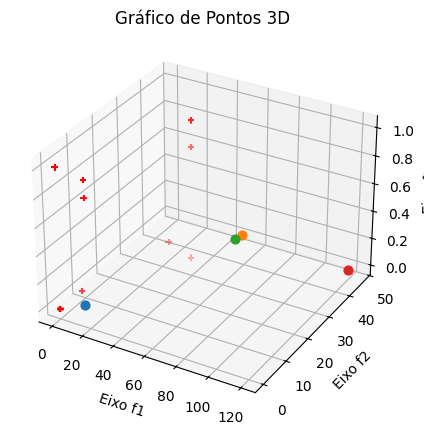

In [89]:
# Criar figura e eixos 3D para ver centroides e clouds
fig = plt.figure(figsize=(5, 5))
ax = fig.add_subplot(111, projection='3d')
j=25 #Define a quantidade de amostras serão usadas
# Plotar os pontos

for cloud in teste.c:
    m = cloud.mean
    ax.scatter(m[0], m[1], m[2],  marker='o', s=40, label='centroide')
ax.scatter(f1[0:j], f2[0:j], f3[0:j], c='red', marker='+', s=20, label='Pontos')

# Rótulos dos eixos
ax.set_xlabel('Eixo f1')
ax.set_ylabel('Eixo f2')
ax.set_zlabel('Eixo f3')

# Título e legenda
ax.set_title('Gráfico de Pontos 3D')
#ax.legend('upper right')
plt.show()

      f1    f2        f3
0    0.0   0.0  0.000000
1    0.0   0.0  0.000000
2    0.0   0.0  0.000000
3    0.0   0.0  0.000000
4    0.0   0.0  0.000000
5    0.0   0.0  0.000000
6    0.0   0.0  0.000000
7    0.0   0.0  0.000000
8    0.0   0.0  0.000000
9    0.0   0.0  0.000000
10   0.0   0.0  0.000000
11  35.0  33.0  0.000000
12  29.0  27.0  0.187042
13  15.0   0.0  0.182742
14  35.0  33.0  0.815201
15   0.0   0.0  0.000000
16  35.0  33.0  1.001953
17  18.0   0.0  0.974305
18   0.0   0.0  0.000000
19   0.0   0.0  1.005595
20  35.0  33.0  1.002271
21  18.0   0.0  0.851052
22   0.0   0.0  0.000000
23   0.0   0.0  1.009201
24   0.0   0.0  0.000000


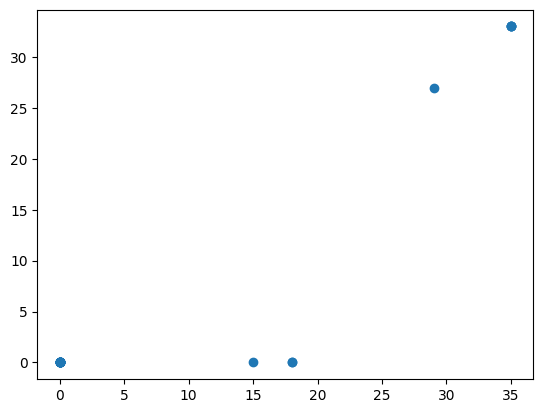

In [ ]:
j=25 #Define a quantidade de amostras serão usadas
f = np.array([f1[:j],f2[:j],f3[:j]]).T
df_teste = pd.DataFrame(f)
df_teste.columns = ['f1','f2','f3',]
print(df_teste)
plt.scatter(f1[:j],f2[:j])

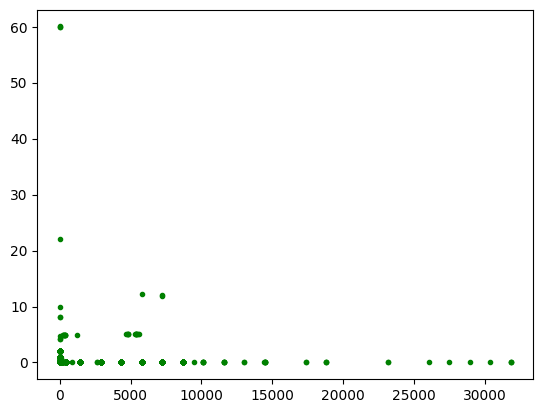

In [15]:
plt.plot(dados.T[0],dados.T[2],'.g')

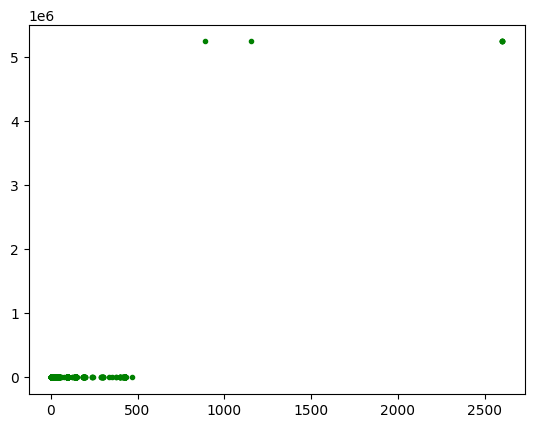

In [16]:
plt.plot(df['TCP Len'],df['MQTT Len'],'.g')

#Processa todas as amostras para o conjunto completo de dados

In [17]:
dados= dados.T
teste=AutoCloud(2)
for t in dados:
    teste.run(np.array(t))

In [26]:
dados

array([[0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        2.89600e+03, 2.89600e+03],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.23760e-05,
        3.77438e-03, 1.50000e-08]], shape=(3, 22029))